In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
column_name = ['Queue_number','Shift','date','Created_queue_hours','Waiting_duration','Number_of_wating_queue','Arrival_rate','Service_rate']
data = pd.read_csv('http://bit.ly/deepblue_data',header=0,names = column_name)

In [3]:
data.head()

,Queue_number,Shift,date,Created_queue_hours,Waiting_duration,Number_of_wating_queue,Arrival_rate,Service_rate
0,101,1,01/01/2020,8,0.08,0,4,2
1,101,1,01/01/2020,8,0.14,1,4,2
2,101,1,01/01/2020,8,0.21,2,4,1
3,101,1,01/01/2020,8,0.27,3,4,1
4,101,1,01/01/2020,8,0.30,3,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 8 columns):
Queue_number              1618 non-null int64
Shift                     1618 non-null int64
date                      1618 non-null object
Created_queue_hours       1618 non-null int64
Waiting_duration          1618 non-null float64
Number_of_wating_queue    1618 non-null int64
Arrival_rate              1618 non-null int64
Service_rate              1618 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 101.2+ KB


In [5]:
dt = data['date'].str.split('/')
dt2 = []
for i in dt:
    i[0],i[1] = i[1],i[0]
    string  = '/'
    i = string.join(i)
    dt2.append(i)


In [6]:
data['date'] = pd.Series(dt2)

In [7]:
data['date'] =  pd.to_datetime(data['date'])

In [8]:
data['weekdays'] = data['date'].dt.weekday

In [9]:
data.drop('date',axis=1,inplace=True)

In [10]:
y = data['Waiting_duration']
X = data.drop('Waiting_duration',axis=1)

In [11]:
y = np.array(y)
X = np.array(X)

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [13]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train,y_train);

In [14]:
prediction = rf.predict(X_test)
error = abs(prediction - y_test)
mape = 100*(error/y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.25 %.


In [15]:
prediction_parameter =np.array([[101,   2,  14,  40,   4,   2,   6]])
rf.predict(prediction_parameter)

array([3.408245])

In [16]:
import math
x = 3.5
math.ceil(x)

4

In [17]:
data['Queue_number'].unique()

array([101, 201, 301, 401], dtype=int64)

In [18]:
flow_dict = {101:{0:[101]},201:{0:[201],1:[101,201]}}

queue_number = 201
created_queue_hour = 8.56
weekday = 4

answer = []

value = 0.0
for j in flow_dict[queue_number]:
    for i in flow_dict[queue_number][j]:
        queue_number = i
        
        created_queue_hour = created_queue_hour + value
        
        if math.ceil(created_queue_hour) in [8,9,10,11,12]:
            shift = 1
        elif math.ceil(created_queue_hour) in [13,14,15,16,17,18]:
            shift = 2
        else:
            shift = 3
            
        arrival_rate = data[(data['Created_queue_hours'] == math.ceil(created_queue_hour)) & (data['weekdays'] == weekday) & (data['Queue_number'] == queue_number)]['Arrival_rate'].max()
        service_rate = data[(data['Created_queue_hours'] == math.ceil(created_queue_hour)) & (data['weekdays'] == weekday) & (data['Queue_number'] == queue_number)]['Service_rate'].min()
        waiting_queue = data[(data['Created_queue_hours'] == math.ceil(created_queue_hour)) & (data['weekdays'] == weekday) & (data['Queue_number'] == queue_number)]['Number_of_wating_queue'].max()

        prediction_list = [queue_number,shift,created_queue_hour,waiting_queue,arrival_rate,service_rate,weekday]
        prediction_parameter =np.array([prediction_list])
        value = value + rf.predict(prediction_parameter)
        
        

        
    answer.append(value[0])
    value = 0
    
answer

[0.22680722619047605, 0.6984994960317417]

In [19]:
department_1 = 101
department_2 = 201
department_3 = 301

manual_prediction = [department_1, department_2, department_3]
 
value = 0.0
created_queue_hour = 8.56
weekday = 4
    
for i in manual_prediction:
    queue_number = i
    
    created_queue_hour = created_queue_hour + value
    
    if math.ceil(created_queue_hour) in [8,9,10,11,12]:
        shift = 1
    elif math.ceil(created_queue_hour) in [13,14,15,16,17,18]:
        shift = 2
    else:
        shift = 3
            
    arrival_rate = data[(data['Created_queue_hours'] == math.ceil(created_queue_hour)) & (data['weekdays'] == weekday) & (data['Queue_number'] == queue_number)]['Arrival_rate'].max()
    service_rate = data[(data['Created_queue_hours'] == math.ceil(created_queue_hour)) & (data['weekdays'] == weekday) & (data['Queue_number'] == queue_number)]['Service_rate'].min()
    waiting_queue = data[(data['Created_queue_hours'] == math.ceil(created_queue_hour)) & (data['weekdays'] == weekday) & (data['Queue_number'] == queue_number)]['Number_of_wating_queue'].max()

    prediction_list = [queue_number,shift,created_queue_hour,waiting_queue,arrival_rate,service_rate,weekday]
    prediction_parameter =np.array([prediction_list])
    value = value + rf.predict(prediction_parameter)
    

value

array([1.28409961])

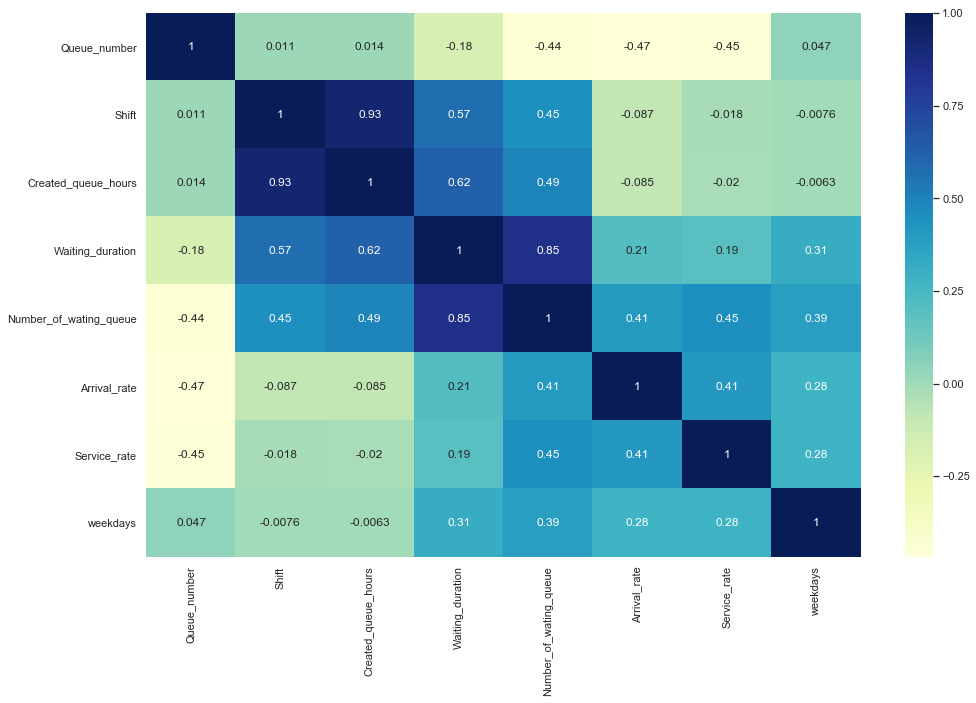

In [35]:
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize = (16,10))
heatmap = sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

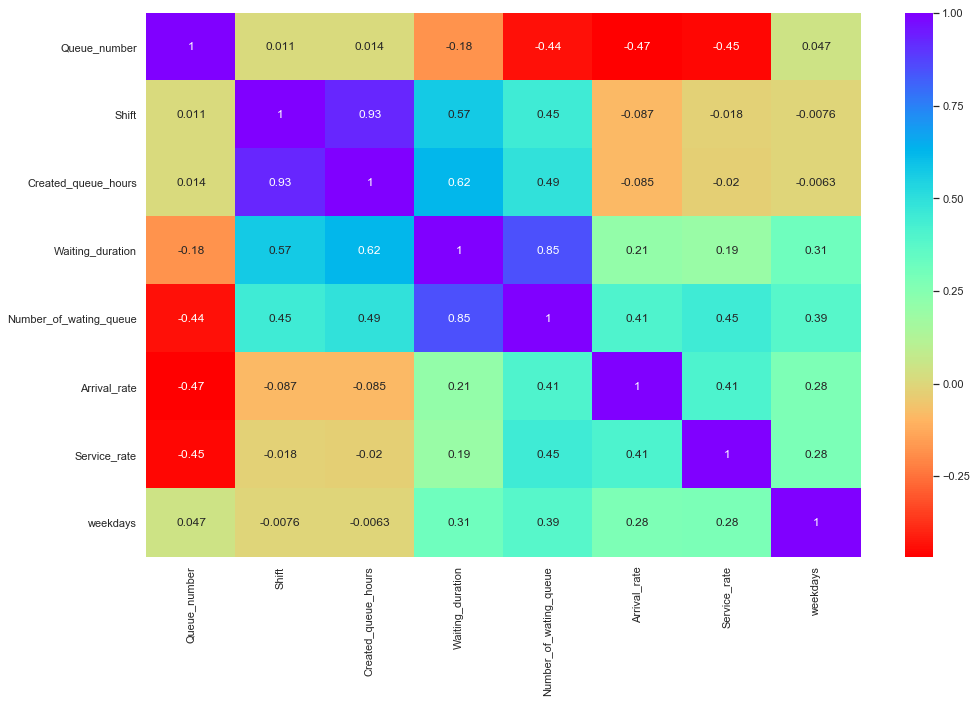

In [34]:
plt.figure(figsize = (16,10))
heatmap = sns.heatmap(data.corr(),annot=True,cmap='rainbow_r')

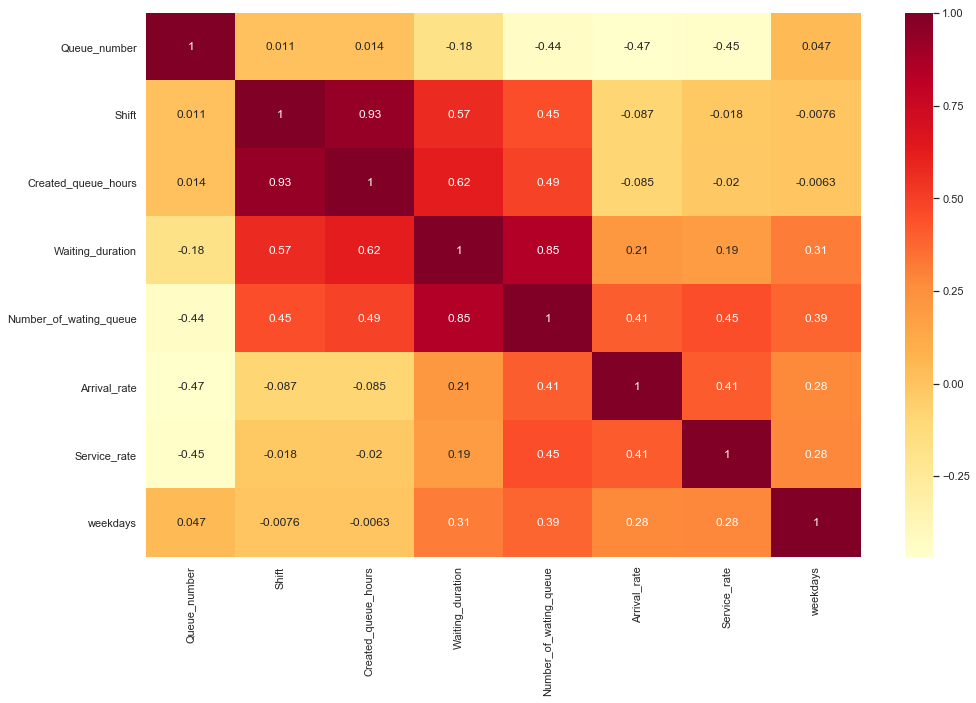

In [32]:
plt.figure(figsize = (16,10))
heatmap = sns.heatmap(data.corr(),annot=True,cmap='YlOrRd')